In [4]:
from time import time
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from nltk.stem import LancasterStemmer
import matplotlib.pyplot as plt
import pandas as pd

# [ models for classification ]
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


# Prepearing data

In [5]:
def read_data(file_path: str,
              delimiter: str = ",",
              headers: bool = True) -> pd.DataFrame:
    if headers:
        return pd.read_csv(file_path, sep=delimiter)
    return pd.read_csv(file_path, sep=delimiter, header=None)


def flat_lists(sentences_list: list[list[str]]) -> list[str]:
    words = []
    for sentence in sentences_list:
        words += sentence
    return words


In [6]:
# [ loading data ]
all_data_frame = read_data("data/Tweets.csv")
print(all_data_frame)


                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \

In [7]:
# [ selecting data ]
airline_sentiment = all_data_frame["airline_sentiment"]

data_frame = pd.DataFrame(
    {"text": all_data_frame["text"]}
    )

print(data_frame)


                                                    text
0                    @VirginAmerica What @dhepburn said.
1      @VirginAmerica plus you've added commercials t...
2      @VirginAmerica I didn't today... Must mean I n...
3      @VirginAmerica it's really aggressive to blast...
4      @VirginAmerica and it's a really big bad thing...
...                                                  ...
14635  @AmericanAir thank you we got on a different f...
14636  @AmericanAir leaving over 20 minutes Late Flig...
14637  @AmericanAir Please bring American Airlines to...
14638  @AmericanAir you have my money, you change my ...
14639  @AmericanAir we have 8 ppl so we need 2 know h...

[14640 rows x 1 columns]


In [8]:
def clean_sentence(text: str) -> str:
    text = re.sub("@[A-Za-z0-9]+", "", text)
    text = re.sub("#", "", text)
    text = re.sub(r"https?:\S+", "", text)

    letters = list(" qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM")
    for symbol in text:
        if symbol not in letters:
            text = text.replace(symbol, "")
    return text


def clean_sentences(sentences_list: list[str]) -> list[list[str]]:
    """
    Input:
     * sentences_list: list[str] - list of sentences

    Output:
     * list[list[str]] - list of cleansed sentences (without special symbols)

    Example:
        Input: ["Hello my World!",
                "How are you?"]

        Output: [["Hello", "my", "World"],
                 ["How", "are", "you"]]
    """
    cleansed_sentences = []
    for tweet in [clean_sentence(tweet).split(" ")
                  for tweet in sentences_list]:

        cleansed_sentence = [word.strip() for word in tweet
                             if
                             word != "" and
                             "http" not in word and
                             not word.isdigit()]

        cleansed_sentences.append(cleansed_sentence)

    return cleansed_sentences


In [9]:
# [ data cleaning ]
cleaned_data_frame = pd.DataFrame(
    {"text": clean_sentences(data_frame["text"])}
    )

cleansed_words = flat_lists(cleaned_data_frame["text"])

print(cleaned_data_frame)


                                                    text
0                                           [What, said]
1      [plus, youve, added, commercials, to, the, exp...
2      [I, didnt, today, Must, mean, I, need, to, tak...
3      [its, really, aggressive, to, blast, obnoxious...
4      [and, its, a, really, big, bad, thing, about, it]
...                                                  ...
14635  [thank, you, we, got, on, a, different, flight...
14636  [leaving, over, minutes, Late, Flight, No, war...
14637  [Please, bring, American, Airlines, to, BlackB...
14638  [you, have, my, money, you, change, my, flight...
14639  [we, have, ppl, so, we, need, know, how, many,...

[14640 rows x 1 columns]


In [10]:
def lemmatization_sentence(sentence: list[str],
                           lancaster: LancasterStemmer) -> list[str]:

    return [lancaster.stem(word) for word in sentence]


def lemmatization_sentences(sentences: list[list[str]],
                            lancaster: LancasterStemmer) -> list[list[str]]:

    return [lemmatization_sentence(sentence, lancaster) for sentence in sentences]


In [11]:
# [ data lemmatization ]
lancaster = LancasterStemmer()

stemmed_data_frame = pd.DataFrame(
    {"text": lemmatization_sentences(cleaned_data_frame["text"], lancaster)}
    )

print(stemmed_data_frame)


                                                    text
0                                           [what, said]
1       [plu, youv, ad, commerc, to, the, expery, tacky]
2      [i, didnt, today, must, mean, i, nee, to, tak,...
3      [it, real, aggress, to, blast, obnoxy, enterta...
4         [and, it, a, real, big, bad, thing, about, it]
...                                                  ...
14635  [thank, you, we, got, on, a, diff, flight, to,...
14636  [leav, ov, minut, lat, flight, no, warn, or, c...
14637         [pleas, bring, am, airlin, to, blackberry]
14638  [you, hav, my, money, you, chang, my, flight, ...
14639  [we, hav, ppl, so, we, nee, know, how, many, s...

[14640 rows x 1 columns]


In [12]:
# [ creating bag of words ]
stemmed_words = flat_lists(stemmed_data_frame["text"])
bag_of_words = list(set(stemmed_words))

print("Counf of stemmed words:", len(stemmed_words))
print(bag_of_words[:100])


Counf of stemmed words: 233344
['timeseverytim', 'motherinlaw', 'wastedeffort', 'meetingout', 'icelandair', 'itscostingmeincom', 'whos', 'us', 'atlno', 'hrsampwaiting', 'fligth', 'fee', 'dcam', 'shrugging', 'mosiacfail', 'fhkte', 'lay', 'burd', 'anywh', 'cltnyc', 'darn', 'disallow', 'lostsuitcas', 'channel', 'intim', 'admir', 'donotflyusair', 'airplanemodewason', 'airb', 'lens', 'infr', 'awww', 'rjs', 'jam', 'premy', 'spel', 'geraghty', 'blackmail', 'birth', 'myrtl', 'evermoreroom', 'prn', 'ft', 'redhead', 'flav', 'loyal', 'dec', 'dallasairport', 'planestrainsandautomobl', 'curios', 'responsivethought', 'flightn', 'findurgrip', 'our', 'intern', 'rip', 'rebookpleas', 'elev', 'jp', 'going', 'preex', 's', 'luck', 'flyquiet', 'circumst', 'colleg', 'in', 'topflight', 'helpfai', 'nowh', 'dre', 'coop', 'businesstravel', 'planelook', 'superfast', 'tmr', 'issu', 'measl', 'ens', 'screensand', 'inperson', 'insulin', 'labyrin', 'mbps', 'lusak', 'bosdc', 'jap', 'fwhei', 'themestim', 'miguel', 'eatu

In [13]:
def sentence_coding(sentence: list[str],
                    bag_of_words: list[str]) -> list[bool]:
    # 1 - word occurs in the bag of words
    # 0 - word does not appear in the sentence
    return [1 if word in sentence else 0 for word in bag_of_words]


def sentences_coding(sentences: list[list[str]],
                     bag_of_words: list[str]) -> list[bool]:
    return [sentence_coding(sentence, bag_of_words) for sentence in sentences]


In [14]:
# [ change words for numbers ]
coded_data_frame = pd.DataFrame(
   sentences_coding(stemmed_data_frame["text"], bag_of_words)
    )

print(coded_data_frame)


       0     1     2     3     4     5     6     7     8     9     ...  8997  \
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     0     0     0     0     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     0     0     0     0     0     0     0     0     0  ...     0   
4         0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
14635     0     0     0     0     0     0     0     0     0     0  ...     0   
14636     0     0     0     0     0     0     0     0     0     0  ...     0   
14637     0     0     0     0     0     0     0     0     0     0  ...     0   
14638     0     0     0     0     0     0     0     0     0     0  ...     0   
14639     0     0     0     0     0     0     0     1     0     0  ...     0   

       8998  8999  9000  9001  9002  90

In [15]:
# [ data normalization by columns (words) ]
scaler = StandardScaler()

normal_data_frame = pd.DataFrame(
    scaler.fit_transform(coded_data_frame)
    )

print(normal_data_frame)


           0         1         2         3         4         5         6     \
0     -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   
1     -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   
2     -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   
3     -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   
4     -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   
...         ...       ...       ...       ...       ...       ...       ...   
14635 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   
14636 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   
14637 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   
14638 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   
14639 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.008265 -0.028642   

           7         8         9     ...      8997 

In [16]:
# [ splitting the data into training data and test data ]
X_train, X_test, y_train, y_test = train_test_split(
    normal_data_frame,
    airline_sentiment,
    test_size=0.2
    )


# MLPClassifier

In [17]:
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(150, 200, 150, 100, 50),
    batch_size=200,
    max_iter=400,
    random_state=1,
    learning_rate_init=0.01)


In [18]:
start = time()
mlp_classifier.fit(X_train, y_train)
mlp_time = time() - start


In [19]:
mlp_y_pred = mlp_classifier.predict(X_test)


In [20]:
print(classification_report(y_test, mlp_y_pred))
mlp_acc = accuracy_score(y_test, mlp_y_pred)



              precision    recall  f1-score   support

    negative       0.74      0.90      0.81      1851
     neutral       0.54      0.47      0.50       606
    positive       0.77      0.24      0.37       471

    accuracy                           0.71      2928
   macro avg       0.68      0.54      0.56      2928
weighted avg       0.70      0.71      0.68      2928



# RandomForestClassifier

In [21]:
rf_classifier = RandomForestClassifier()


In [22]:
start = time()
rf_classifier.fit(X_train, y_train)
rf_time = time() - start


In [23]:
rf_y_pred = rf_classifier.predict(X_test)


In [24]:
print(classification_report(y_test, rf_y_pred))
rf_acc = accuracy_score(y_test, rf_y_pred)


              precision    recall  f1-score   support

    negative       0.77      0.96      0.85      1851
     neutral       0.72      0.36      0.48       606
    positive       0.80      0.50      0.62       471

    accuracy                           0.76      2928
   macro avg       0.76      0.61      0.65      2928
weighted avg       0.76      0.76      0.74      2928



# GaussianNB

In [25]:
gauss_model = GaussianNB()


In [26]:
start = time()
gauss_model.fit(X_train, y_train)
gauss_time = time() - start


In [27]:
gauss_model_y_pred = gauss_model.predict(X_test)


In [28]:
print(classification_report(y_test, gauss_model_y_pred))
gauss_acc = accuracy_score(y_test, gauss_model_y_pred)


              precision    recall  f1-score   support

    negative       0.81      0.36      0.50      1851
     neutral       0.26      0.26      0.26       606
    positive       0.23      0.73      0.35       471

    accuracy                           0.40      2928
   macro avg       0.43      0.45      0.37      2928
weighted avg       0.60      0.40      0.42      2928



# BernoulliNB

In [29]:
bernoulli_model = BernoulliNB()


In [30]:
start = time()
bernoulli_model.fit(X_train, y_train)
bernoulli_time = time() - start


In [31]:
bernoulli_model_y_pred = bernoulli_model.predict(X_test)


In [32]:
print(classification_report(y_test, bernoulli_model_y_pred))
bernoulli_acc = accuracy_score(y_test, bernoulli_model_y_pred)


              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      1851
     neutral       0.63      0.53      0.58       606
    positive       0.74      0.56      0.64       471

    accuracy                           0.78      2928
   macro avg       0.73      0.67      0.69      2928
weighted avg       0.77      0.78      0.77      2928



# LogisticRegression

In [33]:
logreg = LogisticRegression()

start = time()
logreg.fit(X_train, y_train)
logreg_time = time() - start


C:\Users\Jarem\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
logreg_acc = logreg.score(X_test, y_test)

print("Logistic Regression accuracy:", logreg_acc)


Logistic Regression accuracy: 0.6649590163934426


# Plotting

In [35]:
plot_data = {
    "x":      ["Bernoulli", "RF", "MLP", "LogReg", "Gaussian"],
    "y_acc":  [bernoulli_acc,  rf_acc, mlp_acc, logreg_acc, gauss_acc],
    "y_time": [bernoulli_time, rf_time, mlp_time, logreg_time, gauss_time]
}


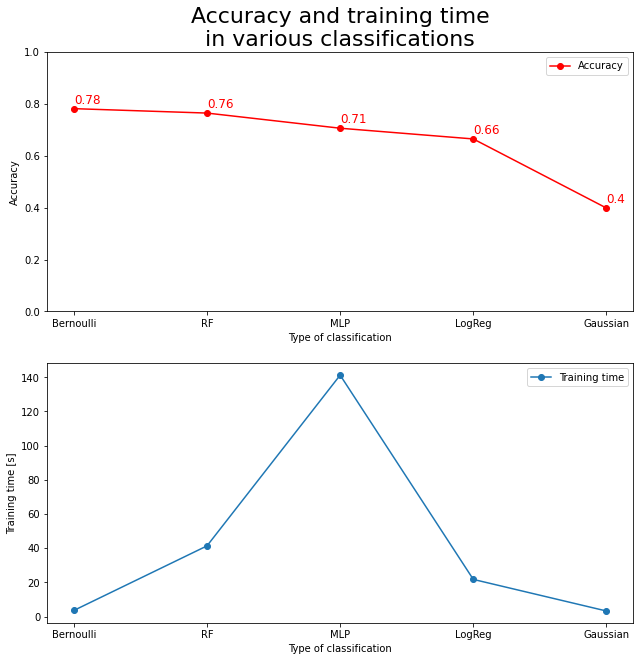

In [71]:
fig, axs = plt.subplots(2)
fig.set_size_inches(10.5, 10.5)
axs[0].set_title("Accuracy and training time\nin various classifications", fontsize=22)

axs[0].plot(plot_data["x"], plot_data["y_acc"], "-o", color="red", label="Accuracy")
axs[0].set_ylim([0.0, 1.0])

for x, y in zip(plot_data["x"], plot_data["y_acc"]):
    axs[0].text(x, y+0.02, str(round(y, 2)), color="red", fontsize=12)

axs[0].legend(loc=0)
axs[0].set_xlabel("Type of classification")
axs[0].set_ylabel("Accuracy")

axs[1].plot(plot_data["x"], plot_data["y_time"], "-o", label="Training time")
axs[1].legend(loc=0)
axs[1].set_xlabel("Type of classification")
axs[1].set_ylabel("Training time [s]")

plt.show()
